# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [40]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url,sep="\t")

### Step 4. See the first 10 entries

In [41]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

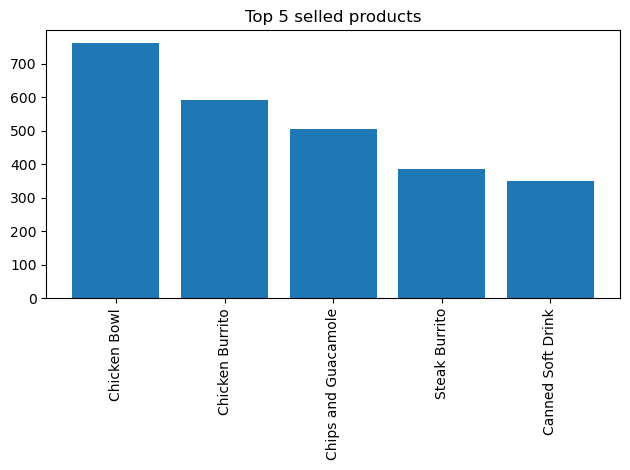

In [47]:
items_more_bought = chipo[["item_name","quantity"]].groupby(chipo.item_name).quantity.sum()
items_more_bought = items_more_bought.reset_index()
top_5 = items_more_bought.sort_values(by="quantity",ascending=False).head(5)
top_5

fig,axs = plt.subplots(tight_layout=True)
axs.bar(top_5.item_name,
        top_5.quantity)
axs.set_title("Top 5 selled products")
plt.xticks(rotation=90)

plt.show()



### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

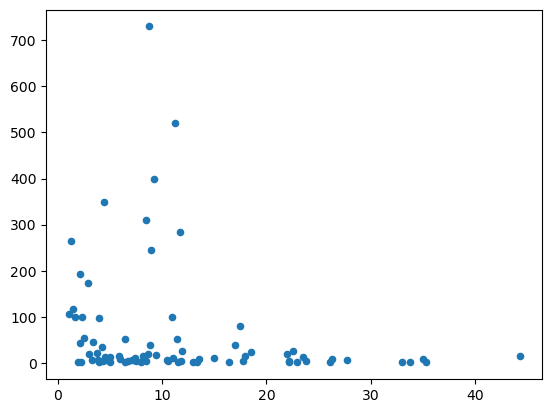

In [58]:
chipo["item_price"] = chipo["item_price"].str.replace("$", "").astype(float)
iterms_per_price = chipo[["item_price","quantity"]].groupby("item_price",as_index=False).quantity.sum()

fig, axs = plt.subplots()
scatter = plt.scatter(iterms_per_price.item_price,
                      iterms_per_price.quantity,
                      s=20)

plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.